In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mydf= pd.read_csv('C:\\Users\\gaura\\Desktop\\practice_wind\\hourly.csv')

In [4]:
mydf

,Time,WindSpeed,Power
0,10/7/2014 1:20,8.22,40.526173
1,10/7/2014 1:30,8.09,38.552540
2,10/7/2014 1:50,7.21,21.313683
3,10/7/2014 2:00,6.75,18.031418
4,10/7/2014 2:10,6.52,16.593281
...,...,...,...
39190,10/6/2015 23:10,7.45,30.580953
39191,10/6/2015 23:20,7.15,28.455153
39192,10/6/2015 23:30,7.27,30.080422
39193,10/6/2015 23:40,8.19,42.483618


In [5]:
mydf['Time']=mydf['Time'].apply(pd.to_datetime)

In [6]:
mydf[['WindSpeed','Power']]=mydf[['WindSpeed','Power']].apply(pd.to_numeric)

In [7]:
mydf['Power']=mydf['Power'] + np.random.normal(0,2,39195)

In [8]:
mydf.index= mydf['Time']
mydf= mydf.drop('Time', axis=1)

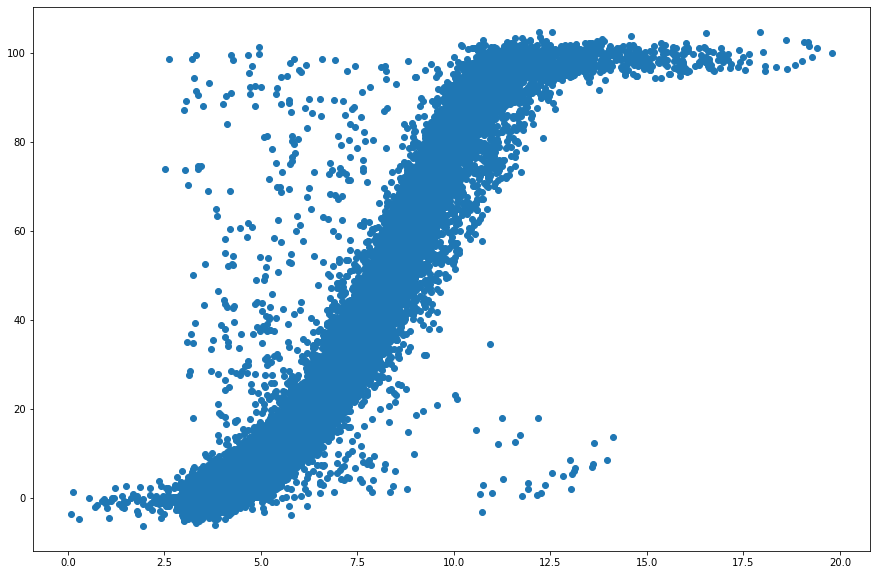

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(mydf['WindSpeed'], mydf['Power'])
plt.show()

In [10]:
X= mydf.values

In [11]:
X

array([[ 8.22      , 38.35451117],
       [ 8.09      , 36.26142956],
       [ 7.21      , 19.81589141],
       ...,
       [ 7.27      , 30.65183699],
       [ 8.19      , 41.33510784],
       [ 7.85      , 38.3981742 ]])

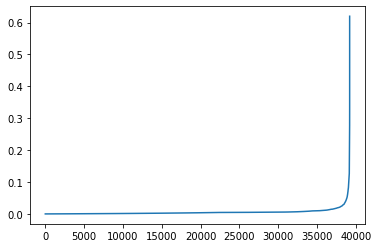

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X=X)
X= scaler.transform(X)


from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [17]:
from sklearn.cluster import DBSCAN

In [122]:
m = DBSCAN(eps=0.2, min_samples=20)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [123]:
label=m.labels_

In [124]:
mydf['clusters']= label

In [125]:
mydf.clusters.unique()

array([ 0, -1], dtype=int64)

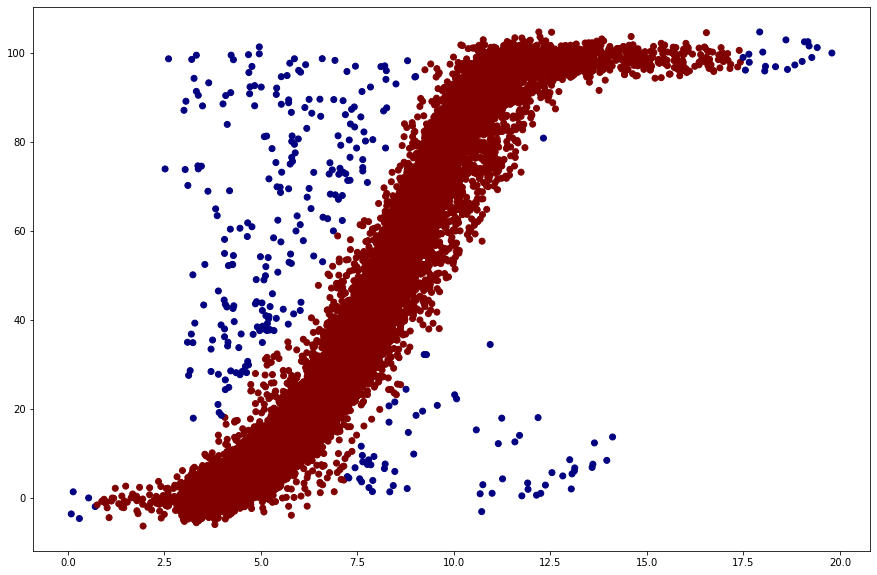

In [126]:
plt.figure(figsize=(15,10))
plt.scatter(mydf['WindSpeed'], mydf['Power'], c=mydf['clusters'], cmap='jet')
plt.show()